In [ ]:
##@Author: Gemma Gordon
#@Date: January 2022
# Script to parse sequence data for CDRs and germlines and generate non-redundant sequence datasets

input datasets for Abs (VH) and Nbs (VHH) sequences, get CDR loop lengths and germlines

In [1]:
import pandas as pd
import numpy as np

load in data from OAS

VHH sequences (Li camel)

In [2]:
vhh_li = ['http://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Li_2017/csv/SRR3544220_Heavy_Bulk.csv.gz',
'http://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Li_2017/csv/SRR3544218_Heavy_Bulk.csv.gz',
'http://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Li_2017/csv/SRR3544219_Heavy_Bulk.csv.gz',
'http://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Li_2017/csv/SRR3544218_Heavy_IGHD.csv.gz',
'http://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Li_2017/csv/SRR3544222_Heavy_IGHM.csv.gz',
'http://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Li_2017/csv/SRR3544221_Heavy_IGHM.csv.gz',
'http://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Li_2017/csv/SRR3544220_Heavy_IGHG.csv.gz',
'http://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Li_2017/csv/SRR3544222_Heavy_Bulk.csv.gz',
'http://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Li_2017/csv/SRR3544218_Heavy_IGHG.csv.gz',
'http://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Li_2017/csv/SRR3544222_Heavy_IGHA.csv.gz',
'http://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Li_2017/csv/SRR3544217_Heavy_IGHM.csv.gz',
'http://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Li_2017/csv/SRR3544217_Heavy_IGHA.csv.gz',
'http://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Li_2017/csv/SRR3544217_Heavy_Bulk.csv.gz',
'http://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Li_2017/csv/SRR3544221_Heavy_Bulk.csv.gz',
'http://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Li_2017/csv/SRR3544219_Heavy_IGHA.csv.gz',
'http://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Li_2017/csv/SRR3544218_Heavy_IGHM.csv.gz',
'http://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Li_2017/csv/SRR3544220_Heavy_IGHA.csv.gz',
'http://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Li_2017/csv/SRR3544219_Heavy_IGHM.csv.gz',
'http://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Li_2017/csv/SRR3544221_Heavy_IGHA.csv.gz',
'http://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Li_2017/csv/SRR3544217_Heavy_IGHE.csv.gz',
'http://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Li_2017/csv/SRR3544217_Heavy_IGHD.csv.gz',
'http://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Li_2017/csv/SRR3544218_Heavy_IGHE.csv.gz',
'http://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Li_2017/csv/SRR3544220_Heavy_IGHM.csv.gz',
'http://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Li_2017/csv/SRR3544217_Heavy_IGHG.csv.gz']

In [5]:
import ast

VH sequences (Eliyahu human)

In [6]:
with open('vh_seqs.txt') as file:
    lines = file.readlines()
    vh_eliyahu = []
    for line in lines:
        seq_file = line.split(' ')[1].strip('\n')
        vh_eliyahu.append(seq_file)
    file.close()

### check sequence redundancy

In [20]:
vh_seqs = []

for url in vh_eliyahu:

    sequences = pd.read_csv(url, header=1)
    vh_seqs.append(sequences['ANARCI_numbering'])


In [23]:
vh_seqs = [v for h in vh_seqs for v in h]

In [27]:
print(len(vh_seqs))
print(len(set(vh_seqs)))
print(len(vh_seqs) - len(set(vh_seqs)))

1621889
1614526
7363


In [28]:
vhh_seqs = []

for url in vhh_li:

    sequences = pd.read_csv(url, header=1)
    vhh_seqs.append(sequences['ANARCI_numbering'])

In [29]:
vhh_seqs = [v for h in vhh_seqs for v in h]

In [30]:
print(len(vhh_seqs))
print(len(set(vhh_seqs)))
print(len(vhh_seqs) - len(set(vhh_seqs)))

1601636
1596446
5190


Create non-redundant dataframes of VH and VHH sequences

In [31]:
abs_seqs_df = []

for url in vh_eliyahu:

    df = pd.read_csv(url, header=1)
    abs_seqs_df.append(df)

In [32]:
abs_seqs_df = pd.concat(abs_seqs_df)

In [34]:
sdabs_seqs_df = []

for url in vhh_li:

    df = pd.read_csv(url, header=1)
    sdabs_seqs_df.append(df)

In [35]:
sdabs_seqs_df = pd.concat(sdabs_seqs_df)

Plot distributions of CDRH loop lengths and germlines

In [36]:
def get_cdr_germlines(df):

    cdrh1s, cdrh2s, cdrh3s = [],[],[]
    for anarci_results in df['ANARCI_numbering']:
        anarci_dict = ast.literal_eval(anarci_results)
        cdrh1, cdrh2, cdrh3 = anarci_dict['cdrh1'], anarci_dict['cdrh2'], anarci_dict['cdrh3']
        cdrh1s.append(cdrh1)
        cdrh2s.append(cdrh2)
        cdrh3s.append(cdrh3)

    df['cdrh1'] = cdrh1s
    df['cdrh2'] = cdrh2s
    df['cdrh3'] = cdrh3s

    return df

In [37]:
sdabs_results_df = get_cdr_germlines(sdabs_seqs_df)

In [38]:
abs_results_df = get_cdr_germlines(abs_seqs_df)

Add CDR lengths in new columns

In [39]:
def get_cdr_lens(df):

    cdrh1_lens, cdrh2_lens, cdrh3_lens = [], [], []

    for row in df['cdrh1']:
        cdrh1_len = len(row)
        cdrh1_lens.append(cdrh1_len)
    for row in df['cdrh2']:
        cdrh2_len = len(row)
        cdrh2_lens.append(cdrh2_len)   
    for row in df['cdrh3']:
        cdrh3_len = len(row)
        cdrh3_lens.append(cdrh3_len)

    df['cdrh1_lens'] = cdrh1_lens
    df['cdrh2_lens'] = cdrh2_lens
    df['cdrh3_lens'] = cdrh3_lens

    return df

In [40]:
sdabs_results_df2 = get_cdr_lens(sdabs_results_df)

In [42]:
abs_results_df2 = get_cdr_lens(abs_results_df)

In [44]:
sdabs_results_df2.columns

Index(['sequence', 'locus', 'stop_codon', 'vj_in_frame', 'v_frameshift',
       'productive', 'rev_comp', 'complete_vdj', 'v_call', 'd_call',
       ...
       'Redundancy', 'ANARCI_numbering', 'ANARCI_status', 'cdrh1', 'cdrh2',
       'cdrh3', 'v_gene', 'cdrh1_lens', 'cdrh2_lens', 'cdrh3_lens'],
      dtype='object', length=104)

In [47]:
def get_germlines(df):

    df['v_gene'] = [v[0:5] for v in df['v_call']]

    return df

In [48]:
sdabs_results_df3 = get_germlines(sdabs_results_df2)

In [49]:
abs_results_df3 = get_germlines(abs_results_df2)

In [52]:
abs_results_df = abs_results_df3
sdabs_results_df = sdabs_results_df3

### Plot distributions of CDR loop lengths (H1, H2, H3) for Abs and Nbs on same plot (normalised frequency)

In [60]:
import matplotlib.pyplot as plt

AttributeError: module 'matplotlib' has no attribute 'get_data_path'

: 

In [ ]:
def make_hist_2db(abs_cdrs1, abs_cdrs2, ab_type1, ab_type2, color1, color2, cdr_num, xlim):

    # create frequency dict of cdr length counts
    
    dict_cdr_occur_1 = dict(abs_cdrs1.value_counts())
    dict_cdr_occur_2 = dict(abs_cdrs2.value_counts())
    
    width = 1

    xnames1 = list(dict_cdr_occur_1.keys())
    yvalues1 = list(dict_cdr_occur_1.values())
    yvalues1_norm = make_percentages(yvalues1)

    
    xnames2 = list(dict_cdr_occur_2.keys())
    yvalues2 = list(dict_cdr_occur_2.values())
    yvalues2_norm = make_percentages(yvalues2)

    
    fig, ax = plt.subplots()
    rects1 = ax.bar(xnames1, [y/100 for y in yvalues1_norm], -width, align='center', color = color1, label = ab_type1, alpha=0.7)
    rects2 = ax.bar(xnames2, [y/100 for y in yvalues2_norm], +width, align='center', color = color2, label = ab_type2, alpha=0.7)
    plt.ylabel("Normalised frequency", fontsize=12)
    plt.xlabel(cdr_num, fontsize=12)
    plt.xlim(0, xlim)
    plt.xticks(ticks=np.arange(0,xlim,2), rotation=45)
    plt.legend(fontsize=12)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.tight_layout()
    plt.show()

def make_percentages(yvalues):
    yvalues_norm = [i/sum(yvalues)*100 for i in yvalues]
    return yvalues_norm 

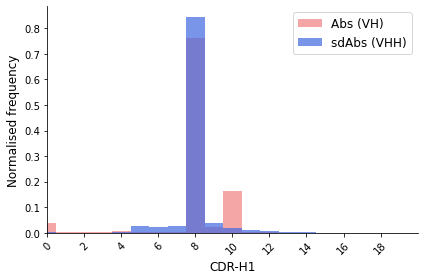

In [ ]:
make_hist_2db(sdabs_results_df['cdrh1_lens'], abs_results_df['cdrh1_lens'], "sdAbs", "Abs", 'royalblue', 'lightcoral', cdr_num='Length of CDR-H1 loop', xlim=20)  

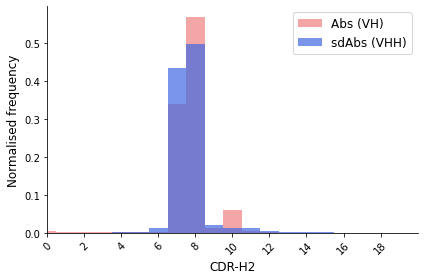

In [ ]:
make_hist_2db(sdabs_results_df['cdrh2_lens'], abs_results_df['cdrh2_lens'], "sdAbs", "Abs", 'royalblue', 'lightcoral', cdr_num='Length of CDR-H2 loop', xlim=20) 

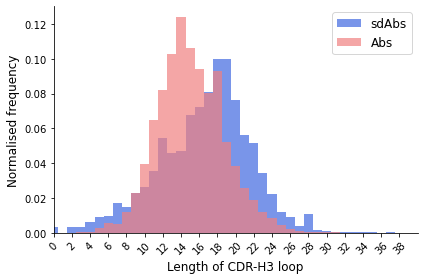

In [ ]:
make_hist_2db(sdabs_results_df['cdrh3_lens'], abs_results_df['cdrh3_lens'], "sdAbs", "Abs", 'royalblue', 'lightcoral', cdr_num='Length of CDR-H3 loop', xlim=20) 

### Plot germline histograms for Abs and Nbs

In [ ]:
print('Number of human sequences:', len(abs_results_df))
print('Number of camel sequences:', len(sdabs_results_df))

Number of human sequences: 1621889
Number of camel sequences: 1601636


In [ ]:
print('Number of different germlines for human VH:', len(set(list(abs_results_df['v_gene']))))
print('Number of different germlines for camel VHH:', len(set(list(sdabs_results_df['v_gene']))))

Number of different germlines for human VH: 303
Number of different germlines for camel VHH: 66


In [ ]:
def make_germline_hist(abs_cdrs1, abs_cdrs2, ab_type1, ab_type2, color1, color2, cdr_num):

    # create frequency dict of cdr length counts
    
    dict_cdr_occur_1 = dict(abs_cdrs1.value_counts())
    dict_cdr_occur_2 = dict(abs_cdrs2.value_counts())
    
    width = 1

    xnames1 = list(dict_cdr_occur_1.keys())
    yvalues1 = list(dict_cdr_occur_1.values())
    yvalues1_norm = make_percentages(yvalues1)
    print(xnames1)
    print(yvalues1_norm)
    
    xnames2 = list(dict_cdr_occur_2.keys())
    yvalues2 = list(dict_cdr_occur_2.values())
    yvalues2_norm = make_percentages(yvalues2)
    print(xnames2)
    print(yvalues2_norm)
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(xnames1, yvalues1_norm, width, align='center', color = color1, label=ab_type1, alpha=0.7)
    rects2 = ax.bar(xnames2, yvalues2_norm, width, align='center', color = color2, label=ab_type2, alpha=0.7)
    plt.ylabel("Normalised frequency", fontsize=12)
    plt.xlabel('V genes', fontsize=12)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.tight_layout()
    plt.legend(fontsize=12)
    plt.show()

def make_percentages(yvalues):
    yvalues_norm = [i/sum(yvalues)*100 for i in yvalues]
    return yvalues_norm 

['IGHV3', 'IGHV4', 'IGHV1', 'IGHV2', 'IGHV5', 'IGHV6', 'IGHV7']
[47.08953572038531, 26.208205370404507, 17.02594937138115, 5.163855233002999, 3.271000666506771, 0.986627321598457, 0.25482631672081135]
['IGHV3']
[100.0]


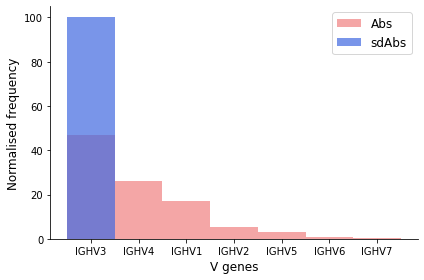

In [ ]:
make_germline_hist(sdabs_results_df['v_gene'], abs_results_df['v_gene'], "sdAbs", "Abs", 'royalblue', 'lightcoral', cdr_num='V genes') 

##### Same germline plot but for structural datasets:

In [ ]:
abs_struc = pd.read_csv('/Users/gemmagordon/Documents/OXFORD/ROTATION 2/nbs_vs_abs/Abs_structural_germlines.csv')
sdabs_struc = pd.read_csv('/Users/gemmagordon/Documents/OXFORD/ROTATION 2/nbs_vs_abs/sdAbs_structural_germlines.csv')

In [ ]:
abs_struc['germlines'].head()

0    ('rhesus', 'IGHV3-103*01')
1      ('human', 'IGHV3-21*01')
2      ('human', 'IGHV3-53*02')
3      ('human', 'IGHV3-30*01')
4      ('human', 'IGHV1-58*01')
Name: germlines, dtype: object

In [ ]:
abs_struc_germlines = []
for germline in list(abs_struc['germlines']):
    germline = ast.literal_eval(germline)[1][0:5]
    abs_struc_germlines.append(germline)

abs_struc_germlines = pd.Series(abs_struc_germlines)

In [ ]:
sdabs_struc_germlines = []
for germline in list(sdabs_struc['germlines']):
    germline = ast.literal_eval(germline)[1][0:5]
    sdabs_struc_germlines.append(germline)

sdabs_struc_germlines = pd.Series(sdabs_struc_germlines)

['IGHV1', 'IGHV3', 'IGHV4', 'IGHV5', 'IGHV2', 'IGHV8', 'IGHV9', 'IGHV7', 'IGHV6']
[40.02242152466368, 35.08968609865471, 9.080717488789238, 7.286995515695067, 4.37219730941704, 1.345291479820628, 1.2331838565022422, 0.8968609865470852, 0.672645739910314]
['IGHV3']
[100.0]


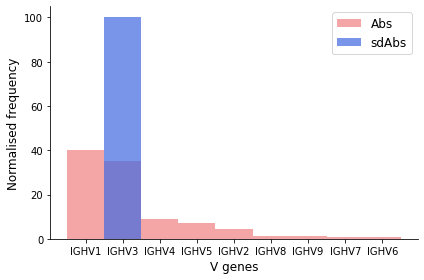

In [ ]:
make_germline_hist(sdabs_struc_germlines, abs_struc_germlines, "sdAbs", "Abs", 'royalblue', 'lightcoral', cdr_num='germlines') 

### Bootstrapping / significance tests

In [ ]:
import dabest
from statsmodels.stats.weightstats import ztest as ztest

In [ ]:
def perform_bootstrap(n_sample, interaction_sizes):
    df = pd.DataFrame([np.random.choice(interaction_sizes[k],n_sample,replace=False) for k in interaction_sizes]).T
    df.columns = [k for k in interaction_sizes]
    x = dabest.load(df, idx=(list(interaction_sizes.keys())[0],list(interaction_sizes.keys())[1]))
    print(x.mean_diff)

#### CDR lengths

#### H1

In [ ]:
zoutput_meanvd = ztest(sdabs_results_df['cdrh1_lens'], abs_results_df['cdrh1_lens'], value=0) 
print(f"ztest continuity percentage: {zoutput_meanvd}")

ztest continuity percentage: (-316.1177196916084, 0.0)


In [ ]:
dict_lengths_meanvd = {'Nbs': sdabs_results_df['cdrh1_lens'],
                     'Abs': abs_results_df['cdrh1_lens'] }
perform_bootstrap(300, dict_lengths_meanvd)

DABEST v0.3.1
             
Good morning!
The current time is Thu Dec 15 10:18:46 2022.

The unpaired mean difference between Nbs and Abs is 0.393 [95%CI 0.24, 0.543].
The p-value of the two-sided permutation t-test is 0.0. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`


### H2

In [ ]:
zoutput_meanvd = ztest(sdabs_results_df['cdrh2_lens'], abs_results_df['cdrh2_lens'], value=0) 

print(f"ztest continuity percentage: {zoutput_meanvd}")

dict_lengths_meanvd = {'Nbs': sdabs_results_df['cdrh2_lens'],
                     'Abs': abs_results_df['cdrh2_lens'] }

perform_bootstrap(300, dict_lengths_meanvd)

ztest continuity percentage: (-160.77916721504252, 0.0)
DABEST v0.3.1
             
Good morning!
The current time is Thu Dec 15 10:18:47 2022.

The unpaired mean difference between Nbs and Abs is 0.147 [95%CI -0.00667, 0.27].
The p-value of the two-sided permutation t-test is 0.0292. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`


### H3

In [ ]:
zoutput_meanvd = ztest(sdabs_results_df['cdrh3_lens'], abs_results_df['cdrh3_lens'], value=0) 

print(f"ztest continuity percentage: {zoutput_meanvd}")

dict_lengths_meanvd = {'Nbs': sdabs_results_df['cdrh3_lens'],
                     'Abs': abs_results_df['cdrh3_lens'] }

perform_bootstrap(300, dict_lengths_meanvd)

ztest continuity percentage: (323.06354932162384, 0.0)
DABEST v0.3.1
             
Good morning!
The current time is Thu Dec 15 10:18:47 2022.

The unpaired mean difference between Nbs and Abs is -1.56 [95%CI -2.28, -0.88].
The p-value of the two-sided permutation t-test is 0.0. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`


In [59]:
abs_results_df3.to_csv('abs_final_seq_dataset.csv', compression='gzip')

OSError: [Errno 28] No space left on device

In [ ]:
sdabs_results_df3.to_csv('sdabs_final_seq_dataset.csv', compression='gzip')